# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

## Install Libraries

In [1]:
# !apt-get update
# !apt-get install -y tesseract-ocr

In [2]:
# !pip install pytesseract
# !pip install easyocr
# !pip install keras-ocr

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [3]:
import cv2
import pytesseract
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Download and visualize sample image
Here we will be downloading the image for OCR.

In [4]:
def display_image(image, title, is_rgb=False):
    if is_rgb:
        # OpenCV loads images in BGR format by default, so we have to convert BGR to RGB for proper color display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

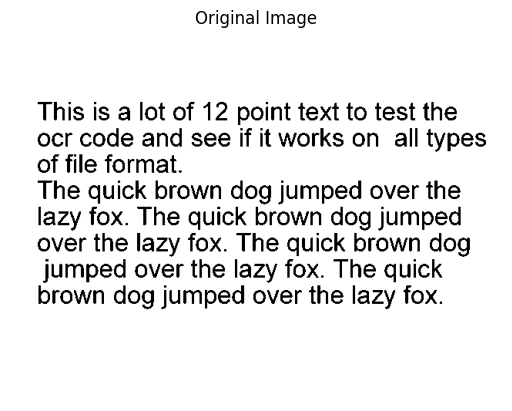

In [5]:
image_path = '/content/OCR_example.png'
image = cv2.imread(image_path)
display_image(image, "Original Image",  is_rgb=True)

## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
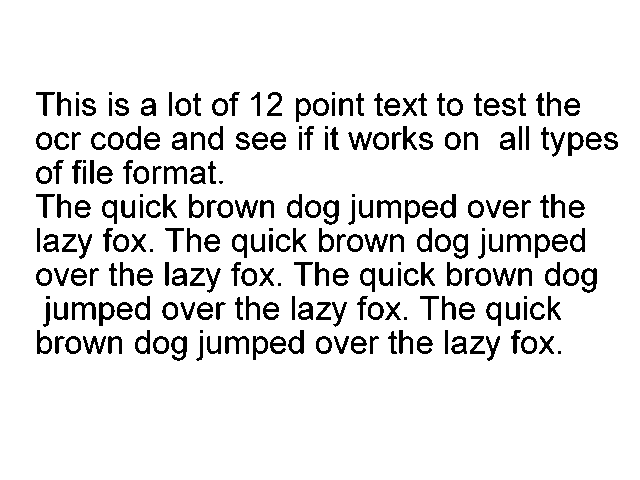

'GrayScale'

In [6]:
grey_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
display(grey_image,"GrayScale")

### Remove noise

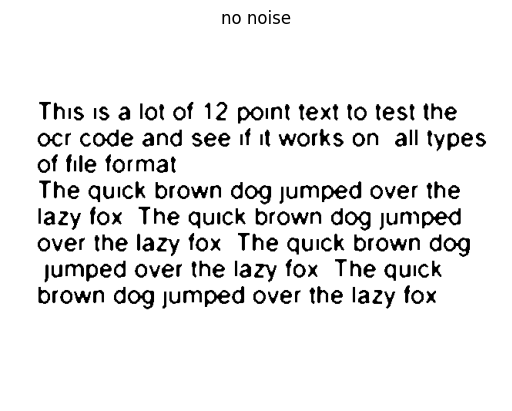

In [7]:
rn_image = cv2.medianBlur(grey_image,5)
display_image(rn_image,"no noise")

### Sharpen the image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
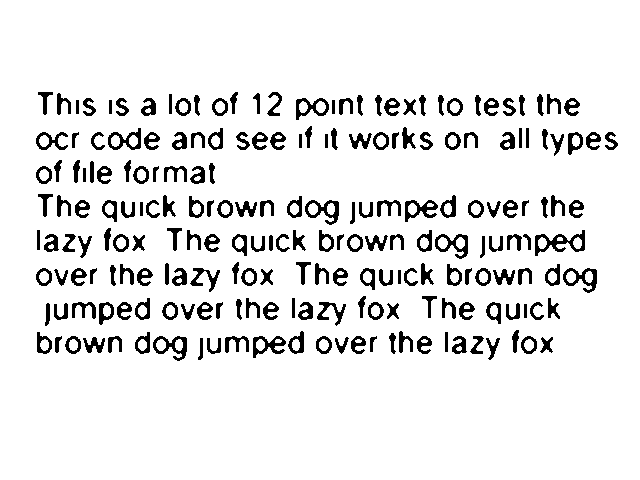

'Sharpen image'

In [8]:
s_image = cv2.filter2D(rn_image,
                       -1,
                       np.array([
                      [0, -1, 0],
                      [-1, 5,-1],
                      [0, -1, 0]
                      ]))
display(s_image,"Sharpen image")

### Binarize the image

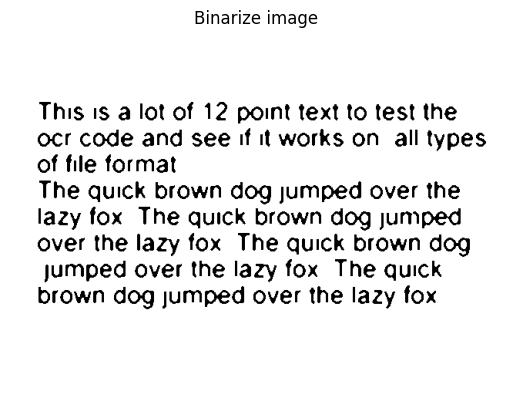

In [9]:
b_image = cv2.threshold(s_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
display_image(b_image,"Binarize image")

## Display preprocessed images
Display the preprocessed images .

## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

In [10]:
# !pip install tensorflow==2.9.1 keras==2.9.0

In [11]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

In [14]:
image = keras_ocr.tools.read(image_path)

images = [image]

prediction_groups = pipeline.recognize(images)

for predictions in prediction_groups:
  for prediction in predictions:
    print(prediction[0])

2/2 [==============================] - 16s 7s/step
12
this
of
point
the
is
lot
text
to
test
a
code
and
if
it
works
all
types
see
ocr
on
of
format
file
the
quick
brown
dog
jumped
the
over
the
quick
dog
jumped
fox
brown
lazy
the
the
quick
dog
lazy
fox
brown
over
quick
jumped
the
the
fox
lazy
over
dog
jumped
the
fox
brown
lazy
over


## Display the OCR predictions
The predictions made by the keras_ocr pipeline are stored in a variable. You should inspect the recognized text and do the following:
* You should print the detected texts in the image.
* You can also use `keras_ocr.tools.drawAnnotations()` to visualize the extracted text.

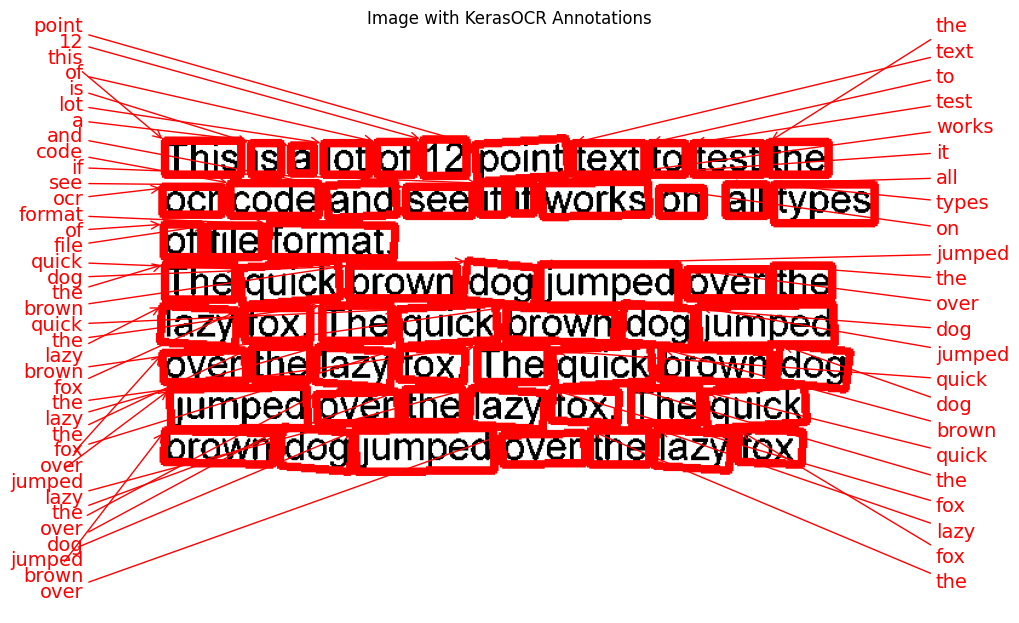

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)